# TP 1 : Courbes Intraday et Relations entre des Variables Journalières

**par Ilyass El Amri et Mohammed Taha Belgnaoui**

Le but de ce TP est de vous failiariser avec la librairie `Pandas` et les bases de données. 

Vous commencerez par construire les courbes intraday moyennes de certains indicateurs de marché tels que le volume, le nombre de trades, le turnover, la volatilité, le spread, l'imbalance ou encore la liquidité disponible aux meilleures limites (best bid et best ask). 

Vous étudierez ensuite les relations entre certains indicateurs journaliers telles que les liens entre le volume et le nombre de trades, le turnover et le nombre de trades et enfin le spread et la volatilité par trade.

## I. Importation et lecture des données

Vous disposez de 10 bases de données au format `DataFrame` de `Pandas`, une pour chaque actif sur 3 bourses différentes :
* **Paris** : Bouygues, LVMH, Sanofi et Total ;
* **Nasdaq** : Amazon, Apple, Google ;
* **Tokyo** : Canon, Panasonic et Sony.

Vous aurez besoin d'importer les librairies Python classiques : `NumPy`, `Pandas`, `MatPlotLib` et `DateTime` pour gérer les dates/heures.

Chaque `DataFrame` présente l'ensemble des transactions pour l'année 2011 pour l'actif et a le même format : 
* l'index `Time` est le timestamp de la transaction ;
* la colonne `TradedPrice` représente le prix moyen par action de la transaction ;
* la colonne `TradedQty` représente le volume de la transaction ;
* la colonne `BidPrice` représente le prix du best bid juste avant la transaction ;
* la colonne `AskPrice` représente le prix du best ask juste avant la transaction ;
* la colonne `BidQty` représente le volume au best bid juste avant la transaction ;
* la colonne `AskQty` représente le volume au best ask juste avant la transaction ;
* la colonne `TradedSign` représente le signe de la transaction (négatif pour Bid et positif pour ask).

L'index `Time` de la série temporelle est au format `DateTime` de Python. Vous pouvez donc extraire les dates, mais aussi l'année, le mois, le jour, l'heure, la minute, etc.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl

In [6]:
stocksEU = ["BOUYGUES", "LVMH", "SANOFI", "TOTAL"]
stocksUS = ["AMAZON", "APPLE", "GOOGLE"]
stocksJP = ["SONY", "PANASONIC", "CANON"]
markets = {'Paris' : stocksEU, "NASDAQ" : stocksUS, "TOKYO" : stocksJP}
# markets = {'EU' : stocksEU}
markets_time = {'Paris':("9:00","17:29"),"NASDAQ":("9:30","15:59"),"TOKYO":("9:30","14:59")}

## II. Courbes intraday de différents indicateurs

Vous devez réaliser les courbes intraday moyennes sur l'année par tranches de 5 minutes en pourcentage (pour comparer les actifs) et faire un graphique pour chaque bourse avec les 3 ou 4 actifs de chacune. Vous commenterez ensuite pour chacune de courbes les résultats obtenus (forme de la courbe, pics, etc.).

Vous pourrez utiliser la fonction `resample` de `Pandas` qui vous permet de rééchantillonner à la fréquence souhaitée et de calculer des statistiques à cette fréquence (comme la somme, moyenne, variance, minimum, maximum, etc.).

### 1. Courbes de volume

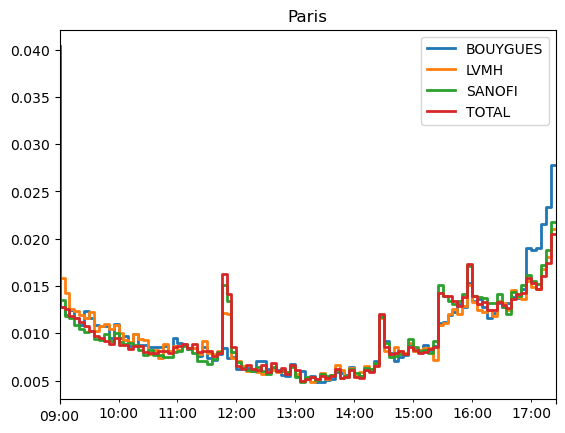

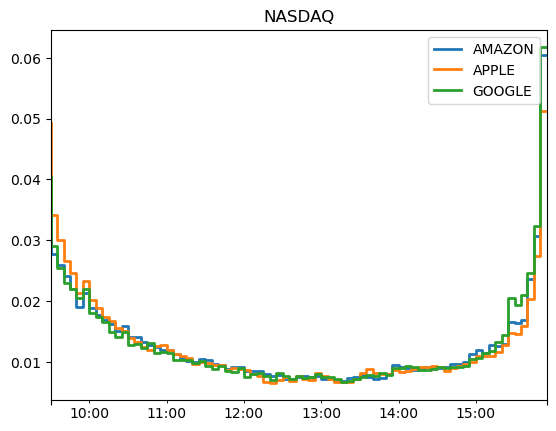

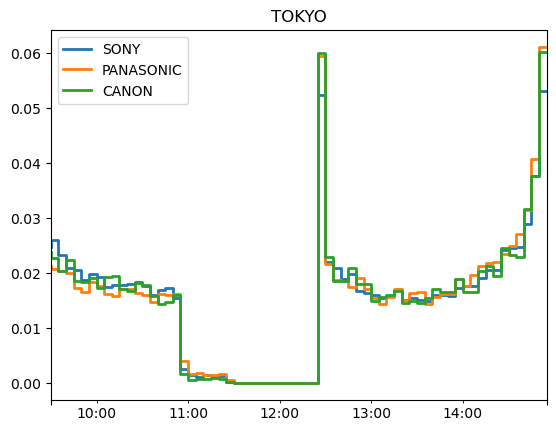

In [7]:
for market in markets:
    fig, ax = plt.subplots()
    ax.set_title(market)
    for stock in markets[market]:  
        df = pd.read_hdf(f'{stock}.h5')

        dfVolume = (
            df['TradedQty']
            .resample('5min')
            .sum()
            .between_time(markets_time[market][0], markets_time[market][1])
            .groupby(lambda x: x.time())
            .agg("mean")
        )

        dfVolume = dfVolume / dfVolume.sum()

      
        dfVolume.index = [pd.Timestamp.combine(pd.Timestamp.today(), t) for t in dfVolume.index]

        def custom_hour_formatter(x, pos):
            dt = mdates.num2date(x)  
            return f"{dt.hour}h" if dt.minute == 0 else ""

        ax.xaxis.set_major_formatter(plt.FuncFormatter(custom_hour_formatter))
        

        dfVolume.plot(ax=ax, drawstyle="steps", linewidth=2, label =stock)
    
    ax.legend()
    plt.show()


Les modèles de volume en forme de U observés sur les marchés représentent un comportement fondamental où l'activité se concentre à l'ouverture et à la clôture du marché:

**Pic de volume à l'ouverture**: Représente les traders établissant des positions basées sur les nouvelles de la nuit et ajustant leurs portefeuilles.

**Pic de volume à la clôture**: Représente les traders institutionnels et fonds indiciels rééquilibrant leurs positions, les traders dénoùant leurs positions journalières, et l'exécution des ordres au marché à la clôture.

L'asymétrie (volume plus élevé à la clôture qu'à l'ouverture) reflète le comportement stratégique des participants qui préfèrent clôturer leurs positions avant la fin du marché plutôt que de porter un risque overnight, mais surtout grace à la présence de acteurs institutionels (fond mutuel, asset managers) qui pourraient rebalancer leur holdings.

Les marchés européens montrent une réaction distinctive lors de l'ouverture des marchés américains (visible comme un pic en milieu de journée autour de 12h30), démontrant l'interconnexion mondiale des marchés financiers et l'influence dominante des actions américaines sur les autres bourses.

La Bourse de Tokyo (TSE) montre un pic de volume important au début de la session d'après-midi en raison d'un fixing, après une pause de 2 heures.

La bourse NASDAQ, en raison du très grand nombre d'acteur impliqué, présente une forme lisse par rapport aux deux autres bourses.

### 2. Courbes du nombre de trades

In [8]:
df

,TradedPrice,TradedQty,BidPrice,AskPrice,BidQty,AskQty,TradedSign
Time,,,,,,,
2011-01-04 09:00:00.952,4255.0,3700,4255.0,4260.0,1070000,1510000,-1
2011-01-04 09:00:02.974,4255.0,100,4255.0,4260.0,1060000,1570000,-1
2011-01-04 09:00:06.699,4260.0,500,4255.0,4260.0,1130000,1600000,1
2011-01-04 09:00:07.874,4260.0,100,4255.0,4260.0,1140000,1710000,1
2011-01-04 09:00:14.508,4255.0,3500,4255.0,4260.0,900000,1740000,-1
...,...,...,...,...,...,...,...
2011-12-30 14:59:55.228,3400.0,300,3395.0,3405.0,3750000,4190000,0
2011-12-30 14:59:55.280,3395.0,100,3395.0,3405.0,3740000,4190000,-1
2011-12-30 14:59:55.560,3400.0,100,3395.0,3400.0,3710000,70000,1


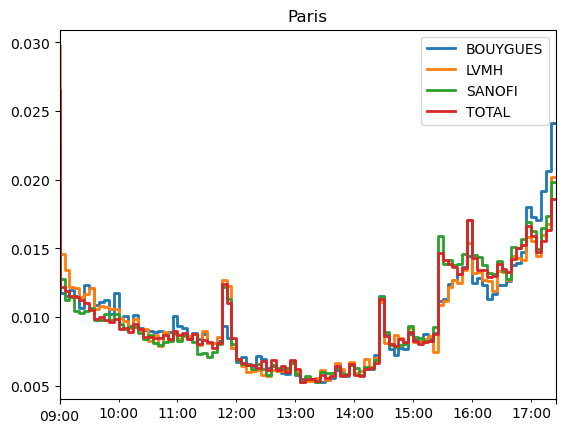

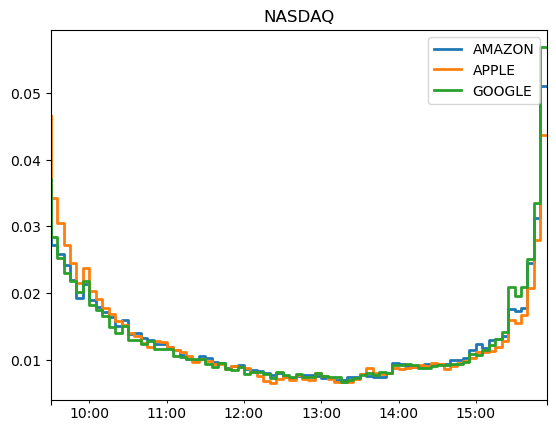

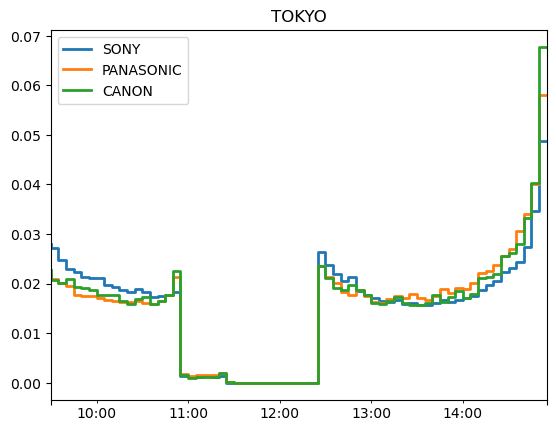

In [9]:
for market in markets:
    fig, ax = plt.subplots()
    ax.set_title(market)
    for stock in markets[market]:  
        df = pd.read_hdf(f'{stock}.h5')

        dfCount = (
            df["TradedQty"]
            .resample('5min')
            .count()
            .between_time(markets_time[market][0], markets_time[market][1])        
            .groupby(lambda x: x.time())
            .agg("mean")
        )

        dfCount = dfCount / dfCount.sum()

      
        dfCount.index = [pd.Timestamp.combine(pd.Timestamp.today(), t) for t in dfCount.index]

        def custom_hour_formatter(x, pos):
            dt = mdates.num2date(x)  
            return f"{dt.hour}h" if dt.minute == 0 else ""

        ax.xaxis.set_major_formatter(plt.FuncFormatter(custom_hour_formatter))
        

        dfCount.plot(ax=ax, drawstyle="steps", linewidth=2, label =stock)
    
    ax.legend()
    plt.show()


Comparer les courbes de volume avec les courbes du nombre de transactions, qui elles aussi montrent une forme en U, peut révéler des informations sur les stratégies de trading sur différents marchés:

Les marchés avec des modèles de volume similaires mais des modèles de nombre de transactions différents pourraient indiquer diverses prévalences de trading algorithmique (nombreuses petites transactions) versus trading institutionnel par blocs (moins de transactions mais plus importantes)

Les actions japonaises montrent probablement des modèles distinctifs pendant leur pause déjeuner (12:00-12:30 JST), avec une chute brutale puis un pic d'activité subséquent

### 3. Courbes de turnover (cash)

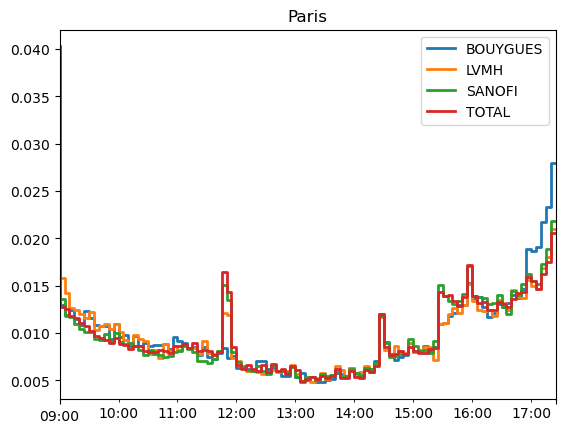

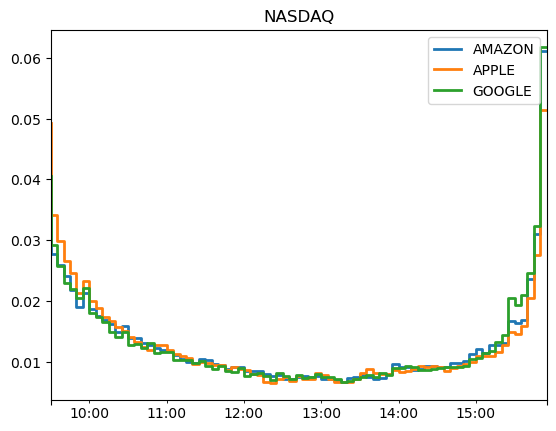

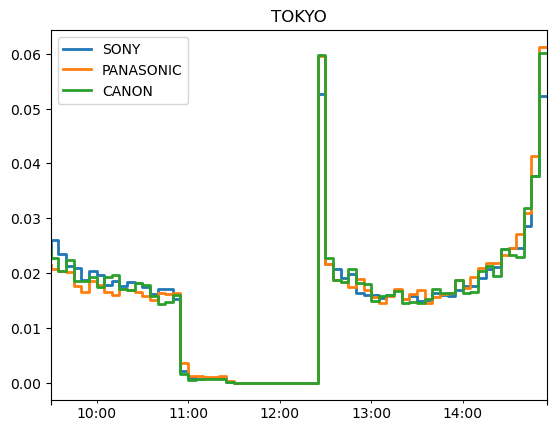

In [ ]:
for market in markets:
    fig, ax = plt.subplots()
    ax.set_title(market)
    for stock in markets[market]:  
        df = pd.read_hdf(f'{stock}.h5')
        df['Turnover'] = df['TradedPrice'] * df['TradedQty']
        dfTurnover = (
            df['Turnover']
            .resample('5min')
            .sum()
            .between_time(markets_time[market][0], markets_time[market][1])        
            .groupby(lambda x: x.time())
            .agg("mean")
        )

        dfTurnover = dfTurnover / dfTurnover.sum()

      
        dfTurnover.index = [pd.Timestamp.combine(pd.Timestamp.today(), t) for t in dfTurnover.index]

        def custom_hour_formatter(x, pos):
            dt = mdates.num2date(x)  
            return f"{dt.hour}h" if dt.minute == 0 else ""

        ax.xaxis.set_major_formatter(plt.FuncFormatter(custom_hour_formatter))
        

        dfTurnover.plot(ax=ax, drawstyle="steps", linewidth=2, label =stock)
    
    ax.legend()
    plt.show()


Les courbes de turnover présent une forme en U, du fait de la relation de proportionnalité avec les courbes de prix et de quantité.

La forme en U des courbes de turnover reflète donc les mêmes dynamiques de marché que celles observées dans les courbes de volume :

- Une activité plus élevée à l'ouverture du marché liée aux ajustements de positions basés sur les informations reçues pendant la fermeture
- Une baisse d'activité pendant les heures de milieu de journée
- Une reprise significative de l'activité vers la clôture du marché

In [11]:
df

,TradedPrice,TradedQty,BidPrice,AskPrice,BidQty,AskQty,TradedSign,Turnover
Time,,,,,,,,
2011-01-04 09:00:00.952,4255.0,3700,4255.0,4260.0,1070000,1510000,-1,15743500.0
2011-01-04 09:00:02.974,4255.0,100,4255.0,4260.0,1060000,1570000,-1,425500.0
2011-01-04 09:00:06.699,4260.0,500,4255.0,4260.0,1130000,1600000,1,2130000.0
2011-01-04 09:00:07.874,4260.0,100,4255.0,4260.0,1140000,1710000,1,426000.0
2011-01-04 09:00:14.508,4255.0,3500,4255.0,4260.0,900000,1740000,-1,14892500.0
...,...,...,...,...,...,...,...,...
2011-12-30 14:59:55.228,3400.0,300,3395.0,3405.0,3750000,4190000,0,1020000.0
2011-12-30 14:59:55.280,3395.0,100,3395.0,3405.0,3740000,4190000,-1,339500.0
2011-12-30 14:59:55.560,3400.0,100,3395.0,3400.0,3710000,70000,1,340000.0


### 4. Courbes de spread moyen

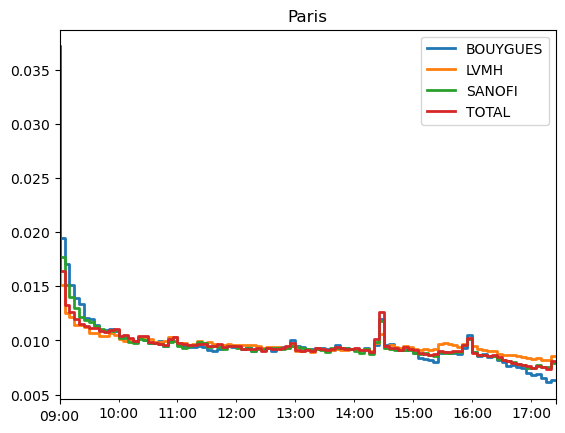

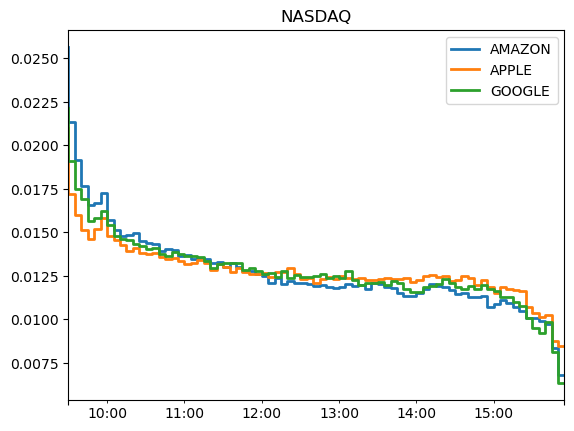

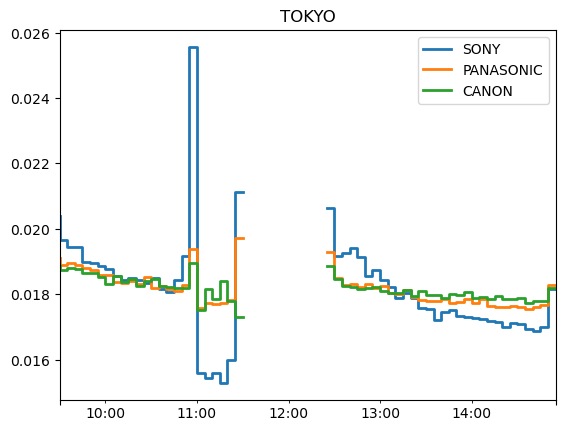

In [ ]:
for market in markets:
    fig, ax = plt.subplots()
    ax.set_title(market)
    for stock in markets[market]:  
        df = pd.read_hdf(f'{stock}.h5')
        df['spread'] = df['AskPrice']- df['BidPrice']
        dfSpread = (
            df['spread']
            .resample('5min')
            .mean()
            .between_time(markets_time[market][0], markets_time[market][1])        
            .groupby(lambda x: x.time())
            .agg("mean")
        )

        dfSpread = dfSpread / dfSpread.sum()

      
        dfSpread.index = [pd.Timestamp.combine(pd.Timestamp.today(), t) for t in dfSpread.index]

        def custom_hour_formatter(x, pos):
            dt = mdates.num2date(x)  
            return f"{dt.hour}h" if dt.minute == 0 else ""

        ax.xaxis.set_major_formatter(plt.FuncFormatter(custom_hour_formatter))
        

        dfSpread.plot(ax=ax, drawstyle="steps", linewidth=2, label =stock)
    
    ax.legend()
    plt.show()


Le spread diminue au cours de la journée, à la fin de la journée, on remarque un resserrement du bid et du ask.

Les courbes de spread montreraient typiquement une relation inverse avec la liquidité—s'élargissant pendant les périodes de volume plus faible et se rétrécissant pendant les périodes de volume plus élevé. Cette relation impacte directement les coûts de transaction pour les participants au marché.

Le spread à l'ouverture du marché est considérablement large, ce qui est contre-intuitif vis-à-vis de la forme en U que présente le turnover et le volume le long d'une journée: on s'attend empiriquement à avoir une forme en U inversé concernant l'évolution du spread le long d'une journée. Cette dissonance mets en relief les différentes dynamiques qui gouvernent les 3 marchés et notamment la confidence des market makers en début de journée.

### 5. Courbes de volatilié

In [13]:
df

,TradedPrice,TradedQty,BidPrice,AskPrice,BidQty,AskQty,TradedSign,spread
Time,,,,,,,,
2011-01-04 09:00:00.952,4255.0,3700,4255.0,4260.0,1070000,1510000,-1,5.0
2011-01-04 09:00:02.974,4255.0,100,4255.0,4260.0,1060000,1570000,-1,5.0
2011-01-04 09:00:06.699,4260.0,500,4255.0,4260.0,1130000,1600000,1,5.0
2011-01-04 09:00:07.874,4260.0,100,4255.0,4260.0,1140000,1710000,1,5.0
2011-01-04 09:00:14.508,4255.0,3500,4255.0,4260.0,900000,1740000,-1,5.0
...,...,...,...,...,...,...,...,...
2011-12-30 14:59:55.228,3400.0,300,3395.0,3405.0,3750000,4190000,0,10.0
2011-12-30 14:59:55.280,3395.0,100,3395.0,3405.0,3740000,4190000,-1,10.0
2011-12-30 14:59:55.560,3400.0,100,3395.0,3400.0,3710000,70000,1,5.0


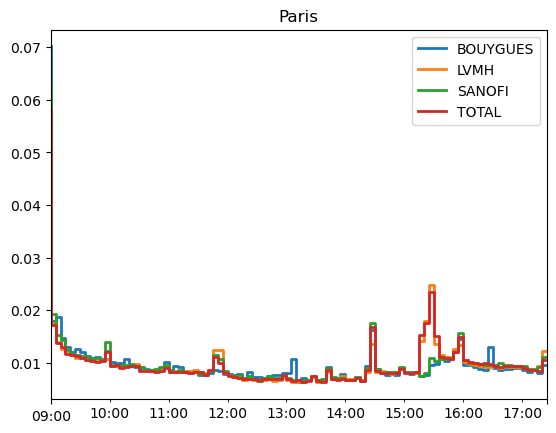

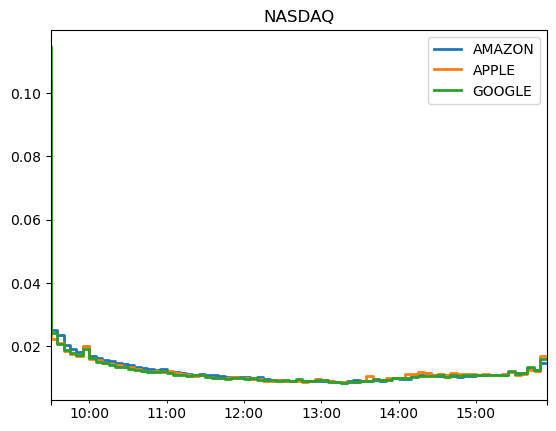

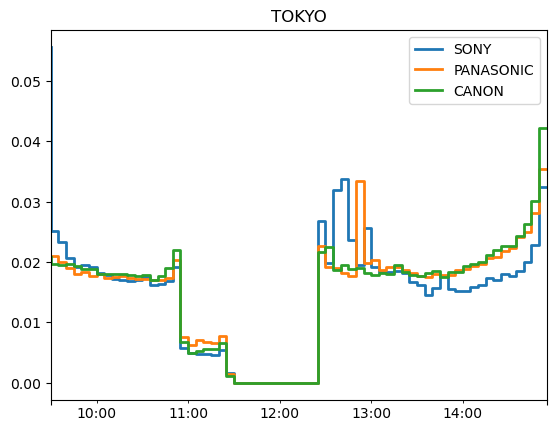

In [15]:
for market in markets:
    fig, ax = plt.subplots()
    ax.set_title(market)
    for stock in markets[market]:  
        df = pd.read_hdf(f'{stock}.h5')
        df['volatility'] = np.log(df['TradedPrice']).diff()**2
        dfvolatility = (
            df['volatility']
            .resample('5min')
            .sum()
            .between_time(markets_time[market][0], markets_time[market][1])        
            .groupby(lambda x: x.time())
            .agg("mean")
        )
        dfvolatility=dfvolatility**0.5
        dfvolatility = dfvolatility / dfvolatility.sum()

      
        dfvolatility.index = [pd.Timestamp.combine(pd.Timestamp.today(), t) for t in dfvolatility.index]

        def custom_hour_formatter(x, pos):
            dt = mdates.num2date(x)  
            return f"{dt.hour}h" if dt.minute == 0 else ""

        ax.xaxis.set_major_formatter(plt.FuncFormatter(custom_hour_formatter))
        

        dfvolatility.plot(ax=ax, drawstyle="steps", linewidth=2, label =stock)
    
    ax.legend()
    plt.show()


Paris : **tendance globale à la baisse avec de petits pics autour de midi et à l'ouverture du marché américain**.
- Tendance globale à la baisse, avec des pics de volatilité à la mi-journée et à l’ouverture du marché américain.
- Cette dynamique reflète une forte activité à l’heure du déjeuner (ajustements de positions) et lors de l’arrivée des flux et informations en provenance des États-Unis.

Nasdaq : **en baisse**.
- En recul, avec une volatilité intrajournalière en baisse.
- Cette stabilité relative peut traduire une plus grande confiance des investisseurs ou l’absence de facteurs susceptibles de provoquer des variations importantes de prix.

Tokyo : **pas aussi stable que Paris et le Nasdaq, avec des pics à l'ouverture et à la clôture (y compris pendant la pause déjeuner)**.
- Moins stable que Paris et le Nasdaq, avec des pics de volatilité à l’ouverture, au moment de la pause déjeuner et à la clôture.
- La structure du marché japonais (y compris sa pause de midi) entraîne un modèle de volatilité en « triple pic », où les traders procèdent à des ajustements avant et après les interruptions, accentuant les mouvements de prix.

### 6. Courbes d'imbalance signée $(Q_{ask}-Q_{bid})/(Q_{ask}+Q_{bid})$

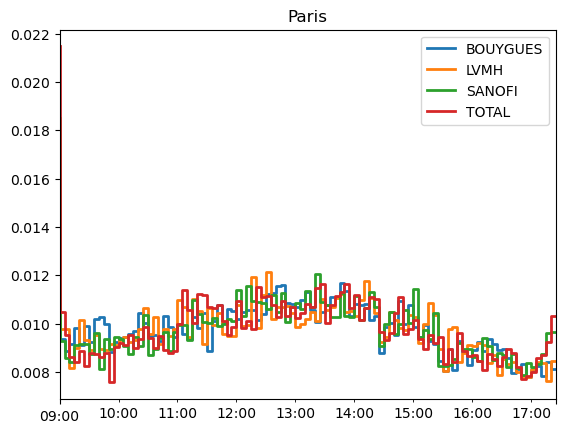

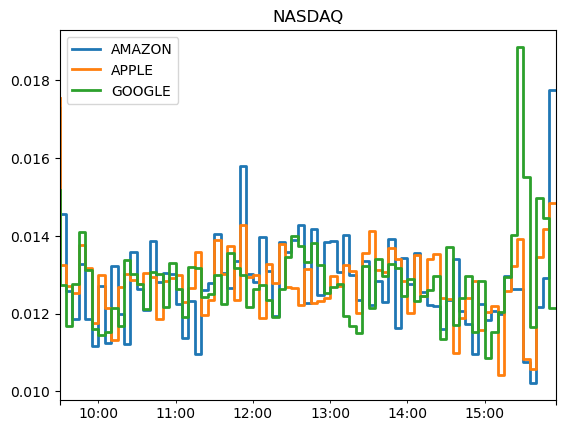

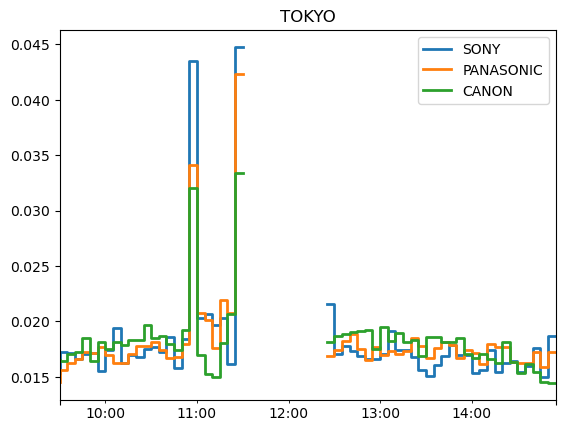

In [25]:
for market in markets:
    fig, ax = plt.subplots()
    ax.set_title(market)
    for stock in markets[market]:  
        df = pd.read_hdf(f'{stock}.h5')
        df = df[["AskQty", "BidQty"]].resample("5min").sum()
        dfImbalance = ((np.abs(df['AskQty'] - df['BidQty']) / (df['AskQty'] + df['BidQty']))
                               .between_time(markets_time[market][0], markets_time[market][1])
                               .groupby(lambda x: x.time())
                               .agg("mean"))
                    
        dfImbalance = dfImbalance / dfImbalance.sum()
      
        dfImbalance.index = [pd.Timestamp.combine(pd.Timestamp.today(), t) for t in dfImbalance.index]

        def custom_hour_formatter(x, pos):
            dt = mdates.num2date(x)  
            return f"{dt.hour}h" if dt.minute == 0 else ""

        ax.xaxis.set_major_formatter(plt.FuncFormatter(custom_hour_formatter))
        

        dfImbalance.plot(ax=ax, drawstyle="steps", linewidth=2, label =stock)
    
    ax.legend()
    plt.show()

- Chaque marché présente une dynamique spécifique : Paris a un pic matinal, le Nasdaq un pic de fin de séance, Tokyo se distingue par son instabilité.
- L’ordre d’achat et de vente se rééquilibre constamment selon la disponibilité de la liquidité et les nouvelles informations.

### 7. Courbes des quantités aux meilleures limites $Q_{ask}+Q_{bid}$

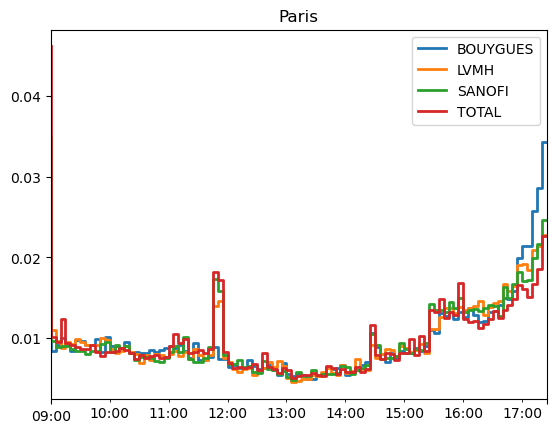

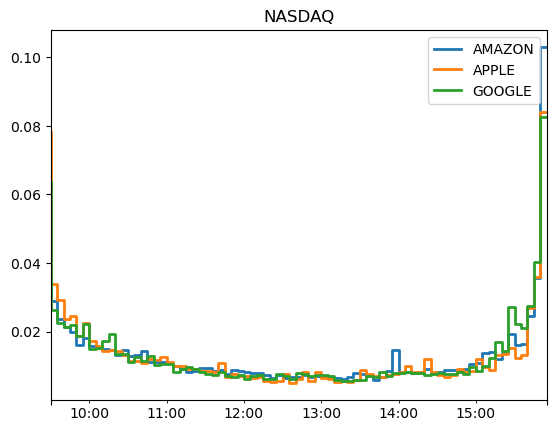

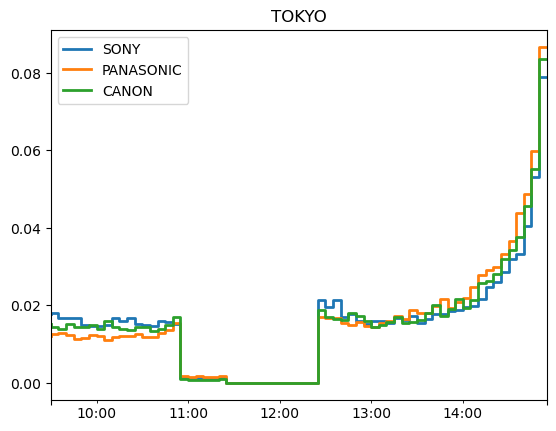

In [ ]:
for market in markets:
    fig, ax = plt.subplots()
    ax.set_title(market)
    for stock in markets[market]:  
        df = pd.read_hdf(f'{stock}.h5')
        df['AskQtyBidQty'] = (df['AskQty'] + df['BidQty'])      
        dfab = (
            df['AskQtyBidQty']
            .resample('5min')
            .sum()
            .between_time(markets_time[market][0], markets_time[market][1])        
            .groupby(lambda x: x.time())
            .agg("mean")
        )
        dfab = dfab / dfab.sum()


      
        dfab.index = [pd.Timestamp.combine(pd.Timestamp.today(), t) for t in dfab.index]

        def custom_hour_formatter(x, pos):
            dt = mdates.num2date(x)  
            return f"{dt.hour}h" if dt.minute == 0 else ""

        ax.xaxis.set_major_formatter(plt.FuncFormatter(custom_hour_formatter))
        

        dfab.plot(ax=ax, drawstyle="steps", linewidth=2, label =stock)
    
    ax.legend()
    plt.show()

- Paris : Pic d'activité à l'ouverture, suivi d'une baisse rapide et d'une tendance plus régulière vers la clôture.
- Nasdaq : Forte présence d'ordres à la clôture, indiquant une hausse de l'activité sur la fin de séance.
- Tokyo : Comportement singulier à l’heure du déjeuner, possiblement lié à des conditions de marché ou des pauses spécifiques.

Le volume de transactions peut se concentrer sur certains créneaux (ouverture, clôture, pause) selon les habitudes des acteurs de marché ou les spécificités de chaque place boursière. Cela souligne l’importance d’adapter sa stratégie au rythme propre à chaque marché et de surveiller les changements soudains de dynamique, souvent révélateurs de mouvements de prix significatifs.

## III. Relation entre les indicateurs journaliers

Vous allez regarder maintenant la relation entre certains indicateurs journaliers à l'aide de régressions linéaires :
* relation entre les volumes et les nombres de trades, 
* entre les turnovers et les nombres de trades, 
* entre la volatilité par trade et le spread bid-ask.

Comme précédemment, vous ferez un graphique pour chaque bourse avec les 3 ou 4 actifs de chacune. Vous commenterez ensuite pour chacune des relations les résultats obtenus.

### 1. Relation volumes/trades

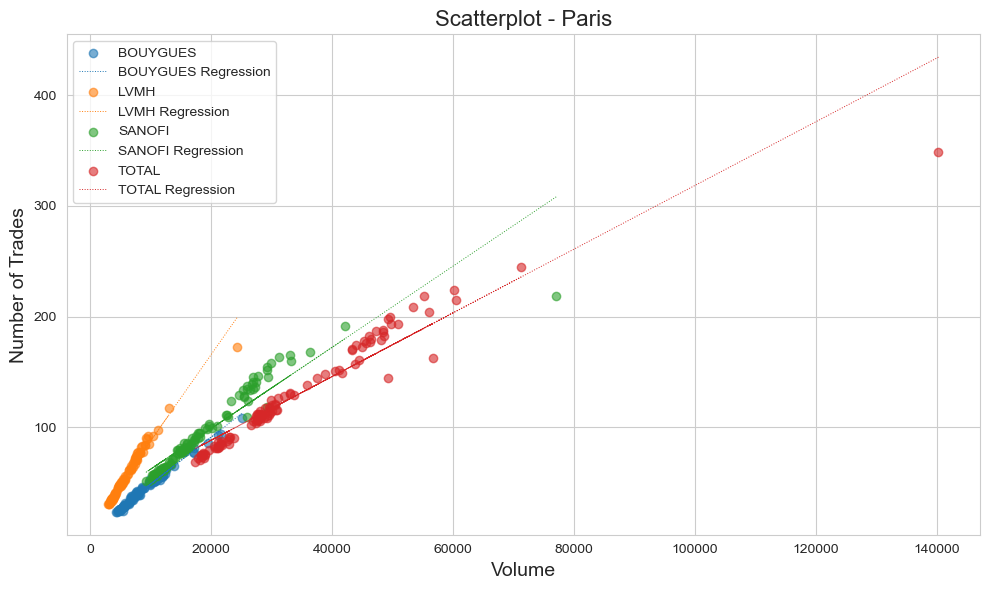

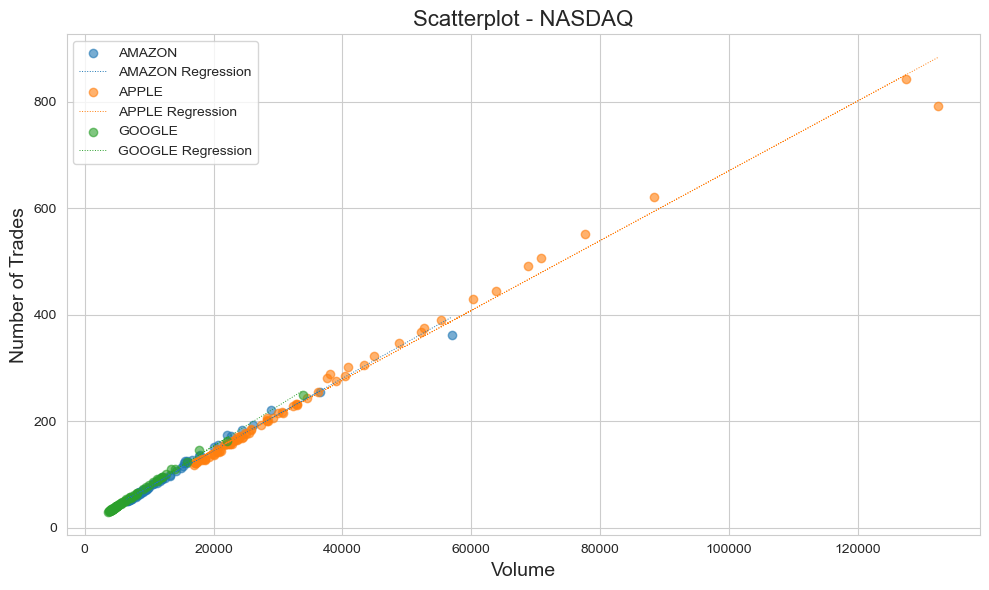

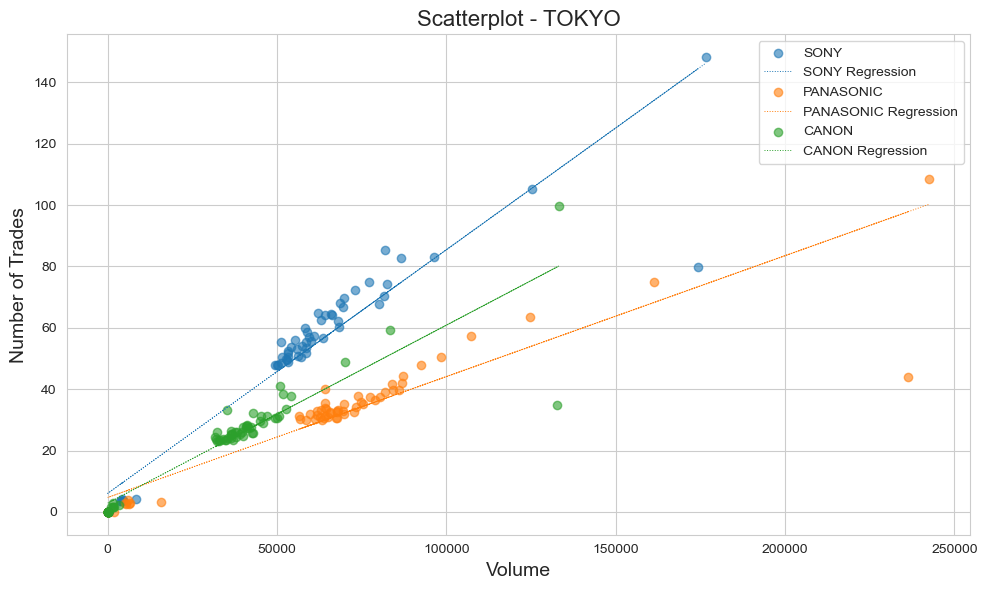

In [34]:
sns.set_style("whitegrid")
mpl.rcParams['figure.dpi'] = 100  

params_grid = { "linestyle": 'dotted', "linewidth": 0.7 }


for market in markets:
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title(f"Scatterplot - {market}", fontsize=16)
    
    for stock in markets[market]:
        df = pd.read_hdf(f'{stock}.h5')
        
        dfVolume = (
            df['TradedQty']
            .resample('5min')
            .sum()
            .between_time(markets_time[market][0], markets_time[market][1])
            .groupby(lambda x: x.time())
            .agg("mean")
        )
        
        dfCount = (
            df["TradedQty"]
            .resample('5min')
            .count()
            .between_time(markets_time[market][0], markets_time[market][1])
            .groupby(lambda x: x.time())
            .agg("mean")
        ).rename("Number of Trades")
        

        ax.scatter(dfVolume, dfCount, label=stock, alpha=0.6, )
        
        if len(dfVolume) > 1 and len(dfCount) > 1:
            X = dfVolume.values
            y = dfCount.values
            
            X_mean = np.mean(X)
            y_mean = np.mean(y)
            b = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean) ** 2)
            a = y_mean - b * X_mean
            
            reg_line = a + b * X
            
            ax.plot(X, reg_line, label=f'{stock} Regression',**params_grid)
    
    ax.set_xlabel('Volume', fontsize=14)
    ax.set_ylabel('Number of Trades', fontsize=14)
    ax.legend()
    
    plt.tight_layout()
    plt.show()


**Commentaires.**

### 2. Relation turnovers/trades

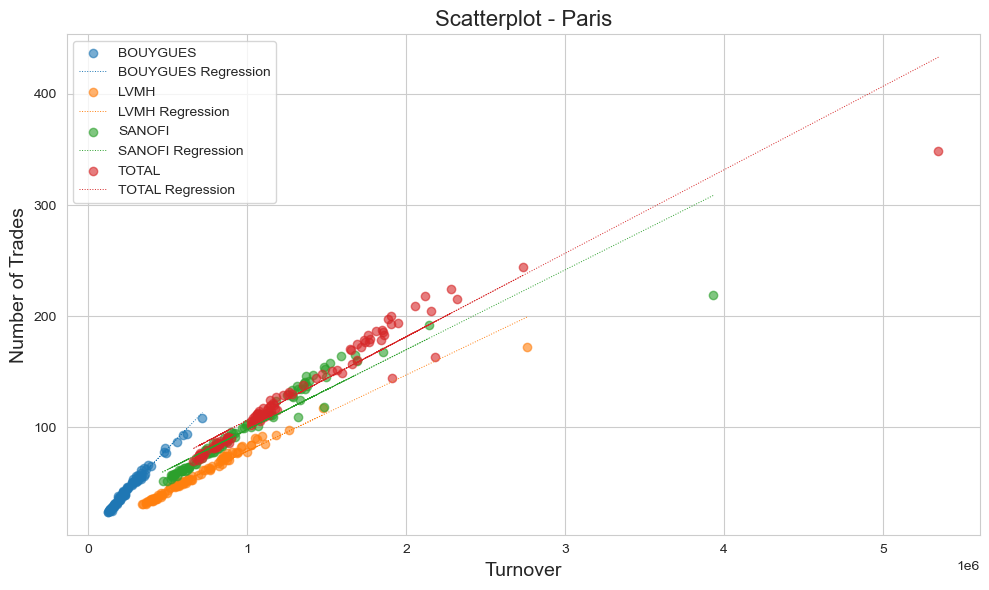

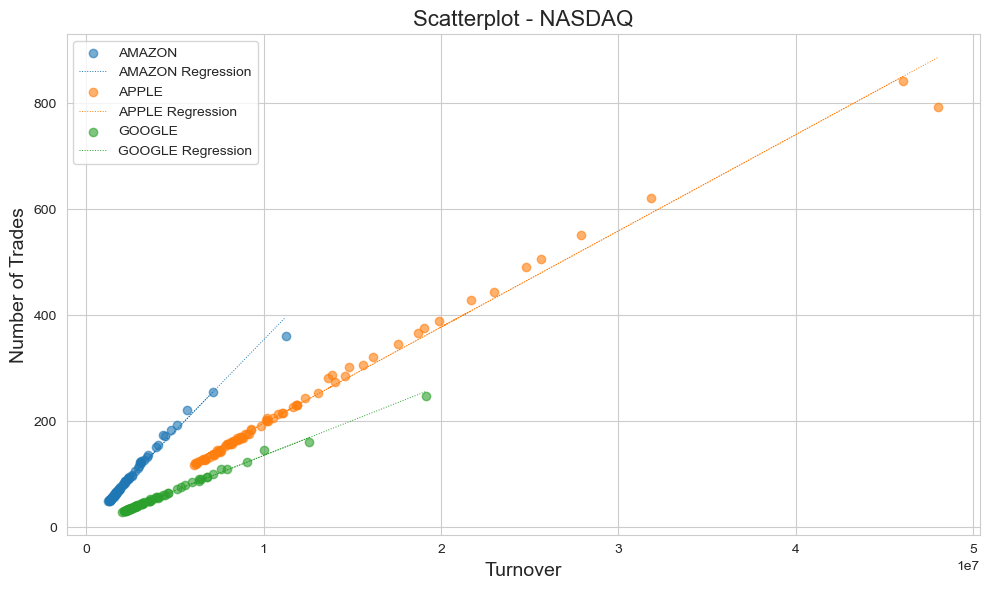

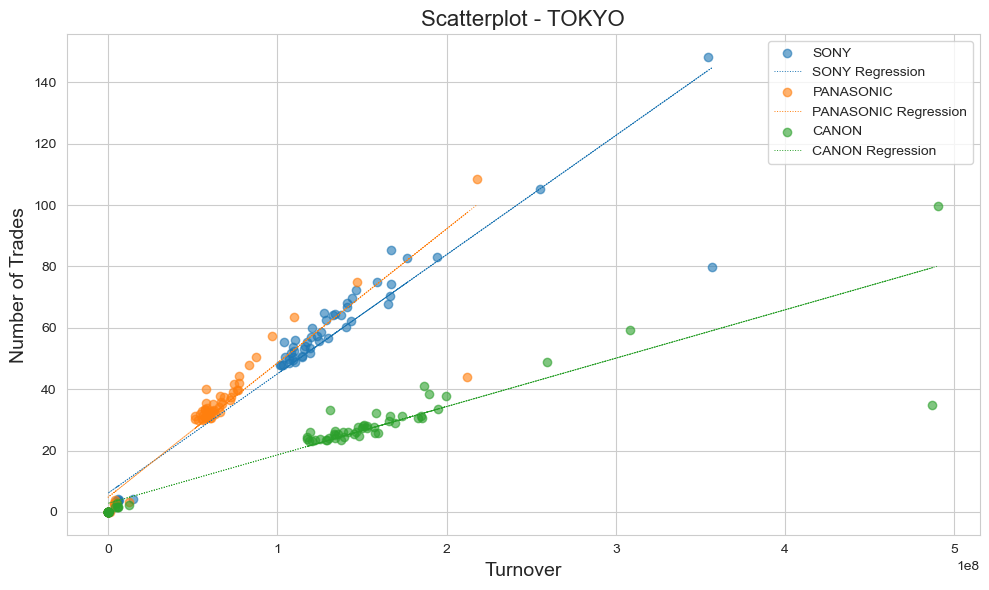

In [35]:
sns.set_style("whitegrid")
mpl.rcParams['figure.dpi'] = 100 
params_grid = { "linestyle": 'dotted', "linewidth": 0.7 }




for market in markets:
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title(f"Scatterplot - {market}", fontsize=16)
    
    for stock in markets[market]:
        df = pd.read_hdf(f'{stock}.h5')
        
        dfCount = (
            df["TradedQty"]
            .resample('5min')
            .count()
            .between_time(markets_time[market][0], markets_time[market][1])        
            .groupby(lambda x: x.time())
            .agg("mean")
        )

        df['Turnover'] = df['TradedPrice'] * df['TradedQty']
        dfTurnover = (
                    df['Turnover']
                    .resample('5min')
                    .sum()
                    .between_time(markets_time[market][0], markets_time[market][1])        
                    .groupby(lambda x: x.time())
                    .agg("mean")
                )
        

        ax.scatter(dfTurnover, dfCount, label=stock, alpha=0.6)
        
        if len(dfTurnover) > 1 and len(dfCount) > 1:  
            X = dfTurnover.values
            y = dfCount.values
            
            X_mean = np.mean(X)
            y_mean = np.mean(y)
            b = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean) ** 2) 
            a = y_mean - b * X_mean  
            
            reg_line = a + b * X
            
            ax.plot(X, reg_line, label=f'{stock} Regression',**params_grid)
    
    ax.set_xlabel('Turnover', fontsize=14)
    ax.set_ylabel('Number of Trades', fontsize=14)
    ax.legend()
    
    plt.tight_layout()
    plt.show()


### 2. Relation Volatilité/Spread Bid-Ask

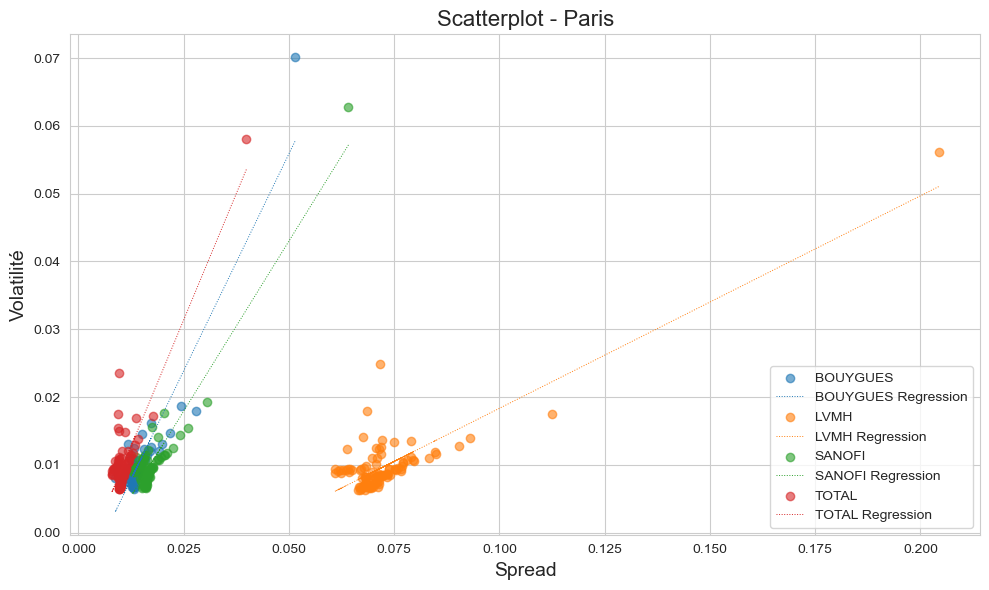

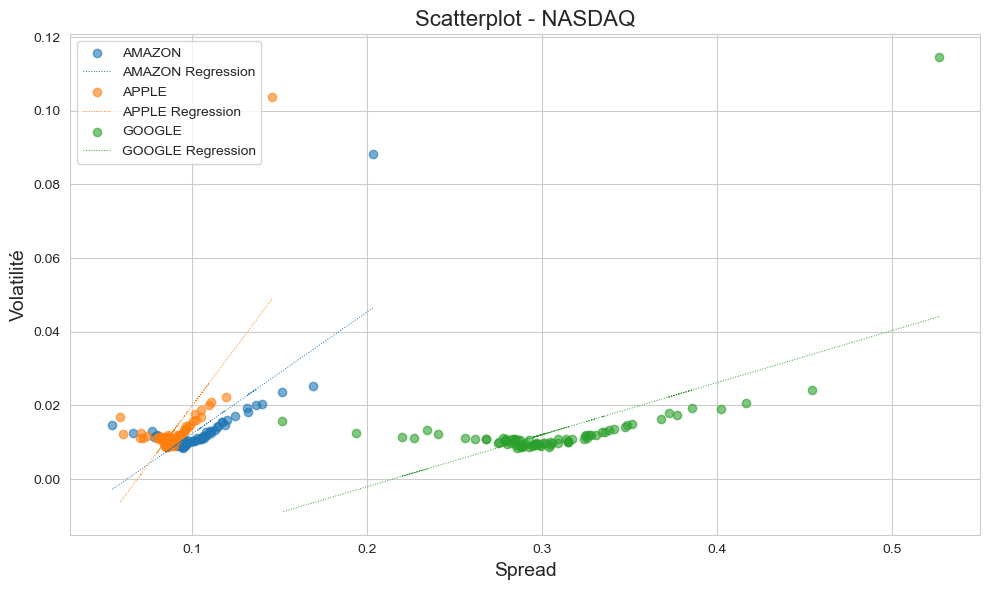

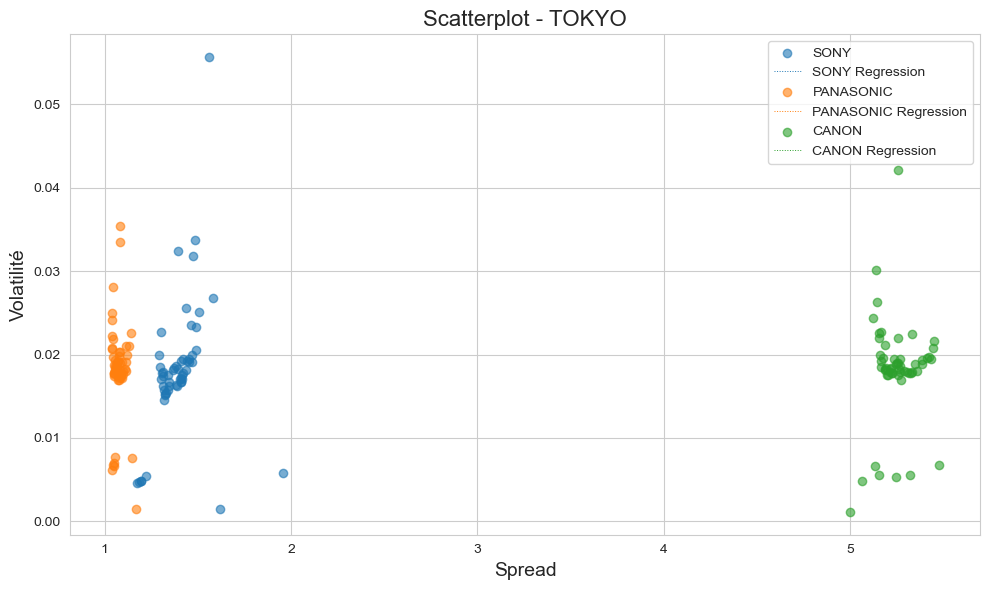

In [ ]:
sns.set_style("whitegrid")
mpl.rcParams['figure.dpi'] = 100

params_grid = { "linestyle": 'dotted', "linewidth": 0.7 }




for market in markets:
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title(f"Scatterplot - {market}", fontsize=16)
    
    for stock in markets[market]:
        df = pd.read_hdf(f'{stock}.h5')

        df['volatility'] = np.log(df['TradedPrice']).diff()**2
        dfvolatility = (
            df['volatility']
            .resample('5min')
            .sum()
            .between_time(markets_time[market][0], markets_time[market][1])        
            .groupby(lambda x: x.time())
            .agg("mean")
        )

        dfvolatility=dfvolatility**0.5
        dfvolatility = dfvolatility / dfvolatility.sum()

        df['spread'] = df['AskPrice']- df['BidPrice']
        dfSpread = (
            df['spread']
            .resample('5min')
            .mean()
            .between_time(markets_time[market][0], markets_time[market][1])        
            .groupby(lambda x: x.time())
            .agg("mean")
        )
        

        ax.scatter(dfSpread, dfvolatility, label=stock, alpha=0.6)
        
        if len(dfvolatility) > 1 and len(dfSpread) > 1:
            X = dfSpread.values
            y = dfvolatility.values
            
            X_mean = np.mean(X)
            y_mean = np.mean(y)
            b = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean) ** 2)
            a = y_mean - b * X_mean
            
            reg_line = a + b * X
            
            ax.plot(X, reg_line, label=f'{stock} Regression',**params_grid)
    
    ax.set_xlabel('Spread', fontsize=14)
    ax.set_ylabel('Volatilité', fontsize=14)
    ax.legend()
    
    # Afficher le graphique
    plt.tight_layout()
    plt.show()

**Relation entre les volumes et le nombre de trades**

En général, une hausse des volumes est associée à une augmentation du nombre de transactions. Cela reflète un intérêt plus marqué des investisseurs pour l’actif et une plus grande participation sur le marché. Les graphiques montrent que les actifs les plus liquides ont tendance à présenter le lien le plus prononcé entre volumes et nombre de trades.

**Relation entre les turnovers et le nombre de trades**

Le turnover (valeur totale échangée) suit en principe l’évolution du nombre de trades : plus il y a de transactions, plus la valeur cumulée est élevée. Toutefois, certains actifs peuvent avoir un turnover élevé avec moins de trades si le montant moyen par transaction est important. Il faut donc distinguer la fréquence de trading du poids financier de chaque trade.

**Relation entre la volatilité par trade et le spread bid-ask**

Une volatilité par trade plus élevée s’accompagne souvent d’un écart plus grand entre l’offre et la demande, signe d’un risque accru pour les market makers. Quand l’incertitude ou les amplitudes de prix augmentent, le spread a tendance à se creuser pour compenser ce risque. Les résultats graphiques illustrent donc, à différents degrés selon l’actif et la bourse, ce lien entre fluctuation de prix par transaction et élargissement du spread.